# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [649]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

# Study data files
mouse_metadata_path = 'data/Mouse_metadata.csv'
study_results_path = 'data/Study_results.csv'

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_data_df = pd.merge(mouse_metadata, study_results, on=['Mouse ID'], how='left')
# Display the data table for preview
complete_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [650]:
# Checking the number of mice.
mouse_count = len(complete_data_df['Mouse ID'].unique())
mouse_count

249

In [651]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id_timepoint = round(complete_data_df[complete_data_df.duplicated(['Mouse ID','Timepoint'])],2)
# print(len(duplicate_mouse_id_timepoint))
duplicate_mouse_id_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.00,0
911,g989,Propriva,Female,21,26,5,47.57,0
913,g989,Propriva,Female,21,26,10,49.88,0
915,g989,Propriva,Female,21,26,15,53.44,0
917,g989,Propriva,Female,21,26,20,54.66,1


In [652]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ids = round(complete_data_df.loc[complete_data_df['Mouse ID'] == 'g989', :],2)
duplicate_mouse_ids

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.00,0
909,g989,Propriva,Female,21,26,0,45.00,0
910,g989,Propriva,Female,21,26,5,48.79,0
911,g989,Propriva,Female,21,26,5,47.57,0
912,g989,Propriva,Female,21,26,10,51.75,0
913,g989,Propriva,Female,21,26,10,49.88,0
914,g989,Propriva,Female,21,26,15,51.33,1
915,g989,Propriva,Female,21,26,15,53.44,0
916,g989,Propriva,Female,21,26,20,55.33,1
917,g989,Propriva,Female,21,26,20,54.66,1


In [653]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = round(complete_data_df.drop_duplicates(subset=['Mouse ID'], keep='last'),2)   #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.05,1
19,s185,Capomulin,Female,3,17,45,23.34,1
29,x401,Capomulin,Female,16,15,45,28.48,0
39,m601,Capomulin,Male,22,17,45,28.43,1
49,g791,Ramicane,Male,11,16,45,29.13,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.93,0
1862,z435,Propriva,Female,12,26,10,48.71,0
1872,z581,Infubinol,Female,24,25,45,62.75,3
1882,z795,Naftisol,Female,13,29,45,65.74,3


In [654]:
# Checking the number of mice in the clean DataFrame.
mice_clean_df_count = len(clean_df)
mice_clean_df_count

249

## Summary Statistics

In [655]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
# The sem() method calculates the standard error of the mean for each column.

summary_table = pd.DataFrame({
    'mean':clean_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)'].round(2),
    'median':clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)'].round(2),
    'var':clean_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)'].round(2),
    'std':clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)'].round(2),
    'sem':clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)'].round(2),
})
summary_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,36.67,38.13,32.67,5.72,1.14
Ceftamin,57.75,59.85,69.98,8.37,1.67
Infubinol,58.18,60.17,74.02,8.60,1.72
Ketapril,62.81,64.49,98.93,9.95,1.99
Naftisol,61.21,63.28,106.02,10.30,2.06
Placebo,60.51,62.03,78.77,8.87,1.77
Propriva,56.74,55.84,69.35,8.33,1.67
Ramicane,36.19,36.56,32.17,5.67,1.13
Stelasyn,61.00,62.20,90.34,9.50,1.94


In [656]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.

summary_table_agggregation = round(clean_df.groupby(('Drug Regimen'))[['Tumor Volume (mm3)']].aggregate(['mean', 'median', 'var', 'std', 'sem']),2)
summary_table_agggregation

Tumor Volume (mm3)                            
                           mean median     var    std   sem
Drug Regimen                                               
Capomulin                 36.67  38.13   32.67   5.72  1.14
Ceftamin                  57.75  59.85   69.98   8.37  1.67
Infubinol                 58.18  60.17   74.02   8.60  1.72
Ketapril                  62.81  64.49   98.93   9.95  1.99
Naftisol                  61.21  63.28  106.02  10.30  2.06
Placebo                   60.51  62.03   78.77   8.87  1.77
Propriva                  56.74  55.84   69.35   8.33  1.67
Ramicane                  36.19  36.56   32.17   5.67  1.13
Stelasyn                  61.00  62.20   90.34   9.50  1.94
Zoniferol                 59.18  61.84   76.85   8.77  1.75

## Bar and Pie Charts

<AxesSubplot:title={'center':'Mice Per Drug Regimen'}, xlabel='Drug Name', ylabel='Number of Mice'>

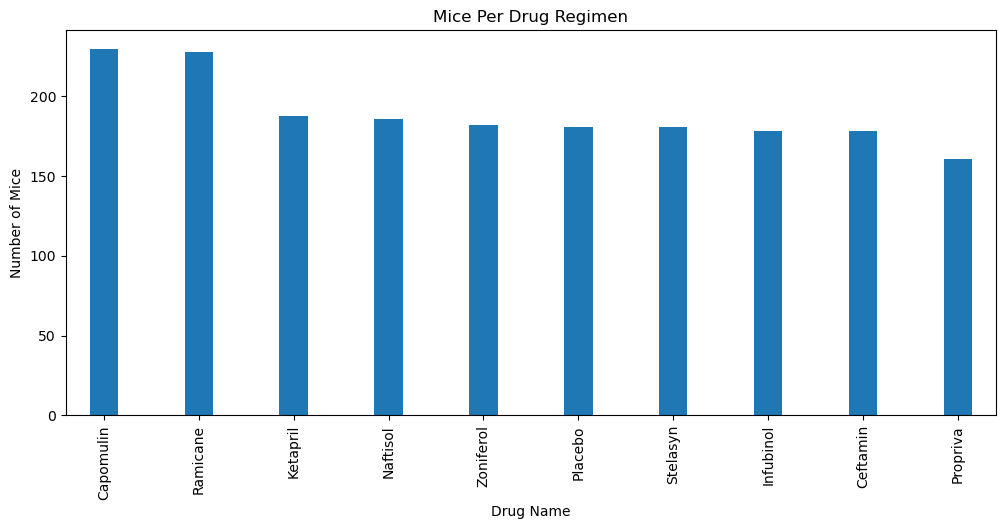

In [657]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
pandas_plot = complete_data_df['Drug Regimen'].value_counts().plot(kind='bar', width=.3, figsize = (12, 5), xlabel='Drug Name', ylabel='Number of Mice', title='Mice Per Drug Regimen') 
pandas_plot

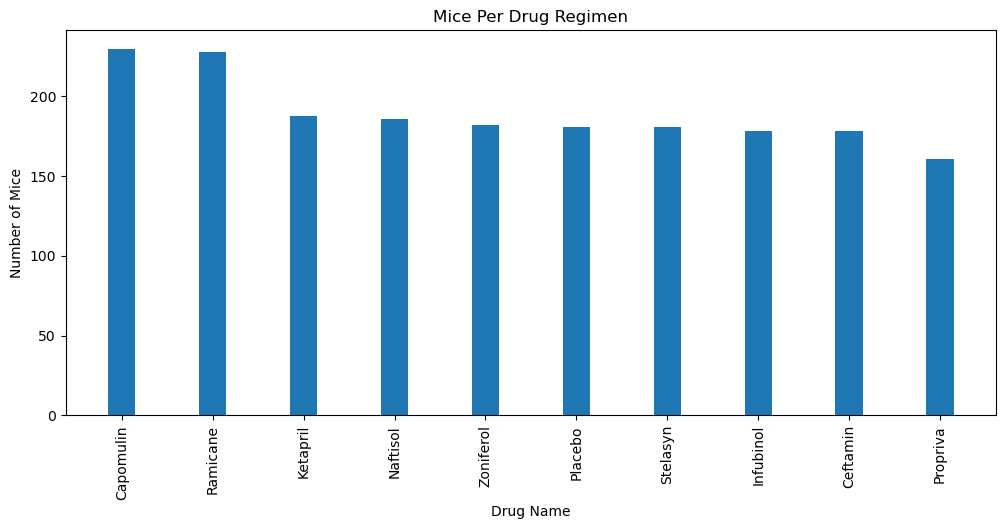

In [658]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
singleColumn = complete_data_df['Drug Regimen'].value_counts()
fig = plt.figure(figsize = (12, 5))
plt.bar(singleColumn.index.values, singleColumn.values, width=.3 )
plt.title('Mice Per Drug Regimen')
plt.xlabel('Drug Name',)
plt.ylabel('Number of Mice')
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:title={'center':'Distribution of Female Versus Male Mice'}, xlabel='<  SEX  >'>

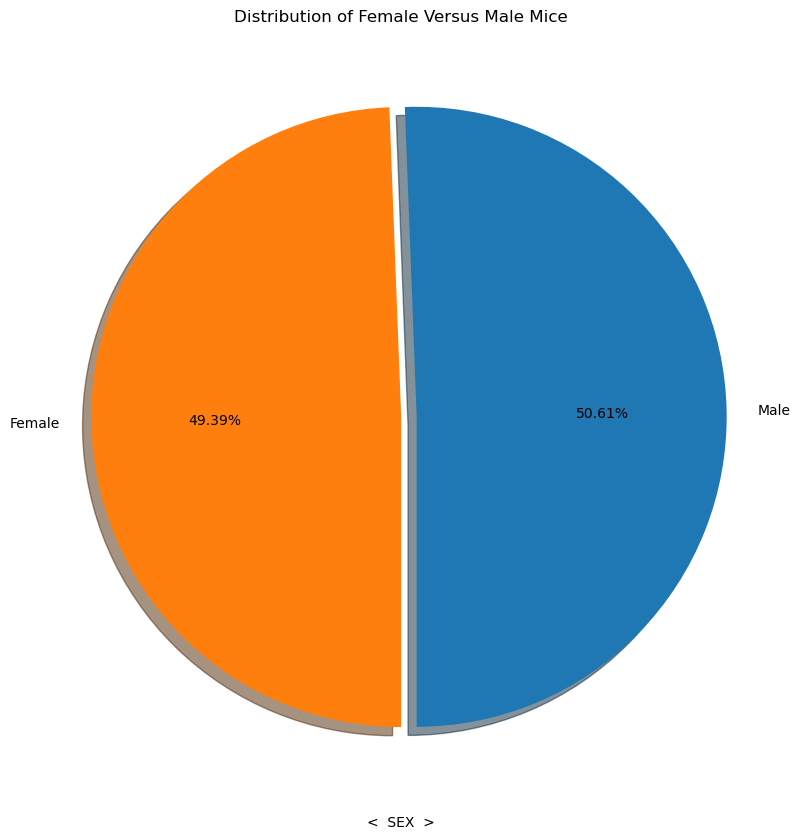

In [659]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas #  https://www.python-graph-gallery.com/140-basic-pieplot-with-panda 
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html  https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct

pandas_pie_plot = complete_data_df['Sex'].value_counts().plot(kind='pie',  figsize = (10, 15),  title='Distribution of Female Versus Male Mice', autopct='%.2f%%', explode= [0.05,0], shadow=True, startangle=270)
pandas_pie_plot.set_xlabel("<  SEX  >") 
pandas_pie_plot.set_ylabel("") 
pandas_pie_plot

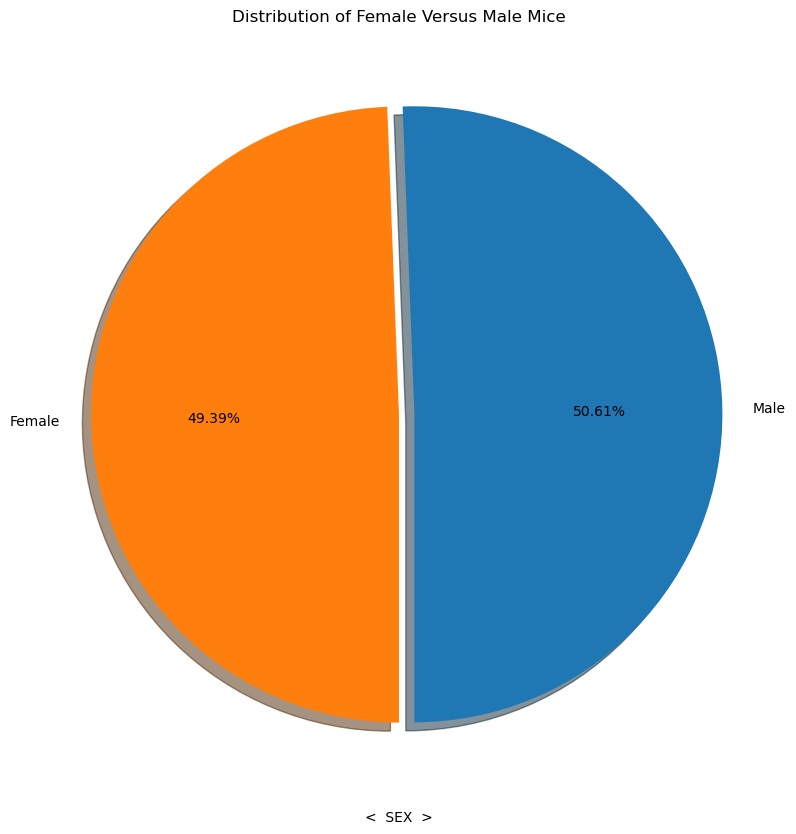

In [660]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot  https://www.w3schools.com/python/matplotlib_pie_charts.asp , https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
sexColumn = complete_data_df['Sex'].value_counts()
# print(sexColumn)
# print(type(sexColumn['Male']))
fig = plt.figure(figsize = (10, 10))
plt.pie([sexColumn['Male'],sexColumn['Female']], labels=['Male', 'Female'], autopct='%1.2f%%', explode= [0.05,0], shadow=True,startangle=270)
plt.title('Distribution of Female Versus Male Mice')
plt.xlabel('<  SEX  >')
plt.show()

## Quartiles, Outliers and Boxplots

In [661]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:    https://www.geeksforgeeks.org/python-pandas-dataframe-isin/
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint_per_mouse_id = pd.DataFrame(clean_df.groupby('Mouse ID')['Timepoint'].max())
# greatest_timepoint_per_mouse_id
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume_df = pd.merge(greatest_timepoint_per_mouse_id, clean_df, on=['Mouse ID','Timepoint'], how='left')
# tumor_volume_df
only_drugs_rows_df = tumor_volume_df[tumor_volume_df["Drug Regimen"].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
tumor_col = only_drugs_rows_df["Tumor Volume (mm3)"]
# tumor_col
only_drugs_rows_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.97,2
1,a251,45,Infubinol,Female,21,25,65.53,1
3,a275,45,Ceftamin,Female,20,28,63.00,3
6,a411,45,Ramicane,Male,3,22,38.41,1
7,a444,45,Ramicane,Female,10,25,43.05,0
...,...,...,...,...,...,...,...,...
239,y769,45,Ceftamin,Female,6,27,68.59,4
240,y793,45,Capomulin,Male,17,17,31.90,2
241,y865,45,Ceftamin,Male,23,26,64.73,3
245,z578,45,Ramicane,Male,11,16,30.64,0


In [672]:
# Put treatments into a list for for loop (and later for plot labels) https://www.geeksforgeeks.org/python-ways-to-remove-duplicates-from-list/ https://www.geeksforgeeks.org/how-to-use-pandas-filter-with-iqr/
treatment_list = sorted(list(set([x for x in clean_df['Drug Regimen']])))

# treatment_list
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
outliersValues = {}
dict_of_values = {}
# Calculate the IQR and quantitatively determine if there are any potential outliers. # Capomulin, Ramicane, Infubinol, and Ceftamin
four_top_treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
for drug in four_top_treatments:
    key1 = drug.lower() + '_data'
    key2 = drug.lower() + '_data_tumor_volume'
    key3 = drug.lower() + '_quartile'
    key4 = drug.lower() + '_quartile_lower'
    key5 = drug.lower() + '_quartile_upper'
    key6 = drug.lower() + '_IRQ'
    key7 = drug.lower() + '_lower_bound'
    key8 = drug.lower() + '_upper_bound'
    data = only_drugs_rows_df.loc[only_drugs_rows_df['Drug Regimen'] ==  drug]
    data_tumor_volume = only_drugs_rows_df.loc[only_drugs_rows_df['Drug Regimen'] ==  drug]['Tumor Volume (mm3)']
    quartile = only_drugs_rows_df.loc[only_drugs_rows_df['Drug Regimen'] ==  drug]['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    quartile_lower = only_drugs_rows_df.loc[only_drugs_rows_df['Drug Regimen'] ==  drug]['Tumor Volume (mm3)'].quantile([.25,.5,.75])[0.25]
    quartile_upper = only_drugs_rows_df.loc[only_drugs_rows_df['Drug Regimen'] ==  drug]['Tumor Volume (mm3)'].quantile([.25,.5,.75])[0.75]
    IRQ = round(only_drugs_rows_df.loc[only_drugs_rows_df['Drug Regimen'] ==  drug]['Tumor Volume (mm3)'].quantile([.25,.5,.75])[0.75] - only_drugs_rows_df.loc[only_drugs_rows_df['Drug Regimen'] ==  drug]['Tumor Volume (mm3)'].quantile([.25,.5,.75])[0.25] , 2)
    lower_bound = round(only_drugs_rows_df.loc[only_drugs_rows_df['Drug Regimen'] ==  drug]['Tumor Volume (mm3)'].quantile([.25,.5,.75])[0.25] - ( 1.5 * round(only_drugs_rows_df.loc[only_drugs_rows_df['Drug Regimen'] ==  \
                  drug]['Tumor Volume (mm3)'].quantile([.25,.5,.75])[0.75] - only_drugs_rows_df.loc[only_drugs_rows_df['Drug Regimen'] ==  drug]['Tumor Volume (mm3)'].quantile([.25,.5,.75])[0.25] , 2)) , 2)
    
    upper_bound = round(only_drugs_rows_df.loc[only_drugs_rows_df['Drug Regimen'] ==  drug]['Tumor Volume (mm3)'].quantile([.25,.5,.75])[0.75] + ( 1.5 * round(only_drugs_rows_df.loc[only_drugs_rows_df['Drug Regimen'] ==  \
                  drug]['Tumor Volume (mm3)'].quantile([.25,.5,.75])[0.75] - only_drugs_rows_df.loc[only_drugs_rows_df['Drug Regimen'] ==  drug]['Tumor Volume (mm3)'].quantile([.25,.5,.75])[0.25] , 2)) , 2)
    
    dict_of_values.update({
        key1 : data,
        key2 : data_tumor_volume,
        key3 : quartile,
        key4 : quartile_lower,
        key5 : quartile_upper,
        key6 : IRQ,
        key7 : lower_bound,
        key8 : upper_bound
    })
    outliersValues.update({drug: [lower_bound,upper_bound]}) 

for treatment in treatment_list:
    if not treatment in outliersValues.keys():
        continue
    else:
        print(f"Potential outliers for {treatment} could be between the values below {outliersValues[treatment][0]} and above {outliersValues[treatment][1]}" )
        print()

   
# add subset 


Potential outliers for Capomulin could be between the values below 20.71 and above 51.83

Potential outliers for Ceftamin could be between the values below 25.35 and above 87.67

Potential outliers for Infubinol could be between the values below 36.83 and above 82.75

Potential outliers for Ramicane could be between the values below 17.91 and above 54.31



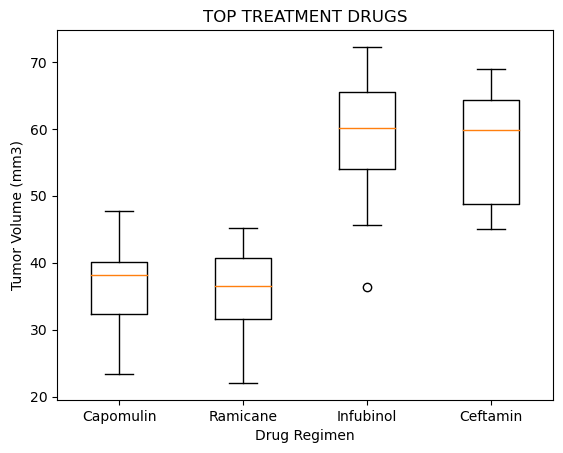

In [673]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

for drug in four_top_treatments:
    tumor_vol_data.append(dict_of_values[drug.lower() + '_data_tumor_volume'])
    # print(dict_of_values[drug.lower() + '_data_tumor_volume'])
plt.boxplot(tumor_vol_data, labels = four_top_treatments) 
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.title('TOP TREATMENT DRUGS')
plt.show()

## Line and Scatter Plots

In [674]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

In [675]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

## Correlation and Regression

In [676]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen